# Evaluation exercises

Ensure that you document your code with brief explanations for each step. Use markdown cells for any comments or clarifications on your thought process and any observations made during the analysis.

## Exercise 1: Dimensionality Reduction and Clustering

Load the Iris dataset and perform the following steps:

1. Apply Principal Component Analysis (PCA) to reduce the dimensionality of the dataset into 2D. Make sure to project your data in 2D with the three types of flowers labeled (with colours,...). How much variation is explained by the two principal components?

<!-- Add an empty line here -->

2. Use k-means clustering on the PCA-transformed data and try to extract some clusters. How does the random_seed influence on the results?

<!-- Add an empty line here -->

3. Compute the Silhouette Score and Adjusted Rand Index (ARI) for the k-means clustering, considering the known labels of the three types of flowers in the Iris dataset.

In [ ]:
#Practical: Applications Course-Machine Learning
#Program: University Vic MS Omics Data Analysis
#Student Name: Pierre Wensel
#Instructor Name:Mr.Miguel Rodriguez
#Date: February 27, 2024

#Note: Code written and executed in following environment for Jupyter Notebook using Kernel for Python 12 on Windows 11:
#https://github.com/mirodriguezgal/MSc_Omics_Uvic_MachineLearning/blob/main/MScOmicsVic_windows.yml
#Environment was created via the following Anaconda Navigator Shell prompt commands:
#conda env create -f MScOmicsVic.yml
#conda activate MScOmicsVic
#python -m ipykernel install --user --name=MScOmicsVic


#EXERCISE 1.1
#Apply Principal Component Analysis (PCA) to reduce the dimensionality of the dataset into 2D. 
#Make sure to project your data in 2D with the three types of flowers labeled (with colours,...). 
#How much variation is explained by the two principal components?


#UNSUPERVISED ALGORITHMS (Dimensionality Reduction and Clustering):Unsupervised learning involves training on unlabeled data,
#and the algorithm tries to discover patterns or relationships in the data without explicit guidance on the output.

#Dimensionality Reduction Objective: Reduce the number of input features while preserving important information.
#This is also commonly used as a pre-processing step for feature extraction.
#Dimensionality reduction algorithms are techniques used to reduce the number of features (or dimensions) in a dataset 
#while preserving its essential information: this is particularly useful for visualization, meaningful compression and 
#discovery of the underlying structure of the data. Two popular dimensionality reduction algorithms are 
#Principal Component Analysis (PCA) and t-Distributed Stochastic Neighbor Embedding (t-SNE).

#Principal Component Analysis (PCA) is a statistical technique that on an n-dimensional matrix of values that:
#Identifies the directions (specific axis in the matrix) at which, if the rest of the data is projected into, the data varies the most: the principal components.
#Represents the data in a new coordinate system defined by these principal components.
#Therefore, the key idea is to find a lower-dimensional representation of the data that captures the maximum amount of variance. Hence, the first principal component is the one that captures the most significant amount of variance in the data, followed by the second principal component, and so on.
#To achieve this, the algorithm follows these steps:
#PCA starts by computing the covariance matrix of the original data, which represents the relationships between the different features.
#Eigenvectors and eigenvalues are extracted from the covariance matrix. The eigenvectors are the principal components and the eigenvalues indicate the variance along each principal component.
#The eigenvectors are sorted in descending order based on the eigenvalues.
#The dimensionality of the data is reduced and the data is transformed linearly into a new coordinate system aligned with the an amount of first principal components depending on the new dimensionality.
#Advantages: Assumes linearity.Computationally efficient for linear dimensionality reduction. Preserves as much variance as possible.

#IRIS SETUP
#Downloading files necessitating pandas package for data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd 

# We will also need numpy for some linear algebra operations
import numpy as np 

# Os is a basic python integrated library. The path utilities are useful to work with local files
import os
from os import path

# To explore the datasets it is always useful to use some plotting packages
import matplotlib.pyplot as plt
# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
%matplotlib inline
%precision 3
np.set_printoptions(precision=3)
import seaborn as sns
sns.set()
# Some dependencies on the seaborn plot package will generate warnings due to the version. Just ignore them
import warnings
warnings.filterwarnings('ignore')

#Importing scikit_learn packages
from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pylab as pl
#import missingno as msno




In [ ]:
#UNIVARIATE EDA

#Loading the iris dataset
#iris=sns.load_dataset('iris')
#iris = pd.DataFrame(iris.data,columns=[iris.feature_names])
iris = datasets.load_iris()

#print(iris.keys())
print('')
#print('feature names:', iris['feature_names'])
print('')
#print('target names:', iris['target_names'])
print('')
#print('data:', iris['data'])
print('')
#print('target:', iris['target'])
print('')
#print('frame:', iris['frame'])
print('')
#print('DESCR:', iris['DESCR'])
print('')
#print('filename', iris['filename'])

csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
# using the attribute information as the column names
col_names = ['Sepal_Length_cm','Sepal_Width_cm','Petal_Length_cm','Petal_Width_cm','Species']

#Creating a dataframe containing ALL data
iris_df =  pd.read_csv(csv_url, names = col_names)

#Performing Univariate Exploratory Data Analysis (EDA)
iris_df.info()
iris_df.describe()
iris_df.head()

# Label encoding because algorithms later used do not take non-numerical or boolean data as inputs
iris_df.Species.replace({'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2},inplace=True)
iris_df.head()

# Null count analysis before modelling 
#p=msno.bar(iris_df)
#sns.countplot(y=iris_df.Species ,data=iris_df)
#plt.xlabel("Count of each Target Species")
#plt.ylabel("Target Species")
#plt.show()

#Prelimnary Exploratory Observations :150 rows
#4 Independent variables to act as factors
#All have same units of measurement (cm)
#No missing data
#Three unique target classes namely : 'Iris-setosa', 'Iris-versicolor' and 'Iris-virginica'
#No class imbalance, all target classes have equal number of rows (50 each).
#The Iris dataset appeats to follow  Gaussian distributions


In [ ]:
##Performing Bivariate Exploratory Data Analysis (EDA)
print(iris_df.groupby('Species').size())

#plotting
fig,ax = plt.subplots(nrows = 2, ncols=2, figsize=(16,10))
row = 0
col = 0
for i in range(len(iris_df.columns) -1):
    if col > 1:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = iris_df['Species'], y = iris_df[iris_df.columns[i]],ax = axes)
    col += 1
plt.tight_layout()
# plt.title("Individual Features by Species")
plt.show()

#Plotting correlations
p=sns.pairplot(iris_df, hue = 'Species')
#sns.pairplot(data=iris,hue='species')

#Plotting heatmap
plt.figure(figsize=(15,15))
p=sns.heatmap(iris_df.corr(), annot=True,cmap='RdYlGn') 
#sns.heatmap(iris.corr())

#Plotting histograms to identify features that do not help explain target outcome. The SepalWidthCm feature seems 
#to be less relevant in explaining the target class as compared to the other features and the distributions of features 
#appear non-ideal.
iris_df.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

sns.boxplot(x='Species', y='Petal_Length_cm', data=iris_df)
#using jitter so that all the points don't fall in single vertical lines above species
plt.figure(figsize=(8,8))
sns.boxplot(data=iris_df, x = 'Species',y = 'Petal_Length_cm')
sns.stripplot(data=iris_df, x='Species', y='Petal_Length_cm', jitter=True, edgecolor='green')
sns.boxenplot(data=iris_df,palette='rainbow')
plt.show()


In [ ]:
#PCA
#PCA finds a new set of dimensions where all the dimensions are orthogonal 
#and hence linearly independent and ranked according to the variance of data along them. 
#Significance of dimension value increases with increased spread/variance.
#PCA Approach:
#Calculate the covariance matrix X of data points.
#Calculate eigen vectors and corresponding eigen values.
#Sort the eigen vectors according to their eigen values in decreasing order.
#Choose first k eigen vectors and that will be the new k dimensions.
#Transform the original n dimensional data points into k dimensions.

#Raw data file
X = iris.data
y = iris.target
print('X.shape:', X.shape)
#
X1 = iris_df.drop(['Species'],axis=1)
y1 = iris_df.Species
# Continous independent variables
x_df = pd.DataFrame(iris['data'])
# Labels or dependent variable (discrete classes)
y_df = pd.DataFrame(iris['target'])



#Standardizing the data: The objetive of PCA is to maximize the variance. If the features ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
#have different scales or units, it is important to standardize the data by subtracting the mean and dividing by the 
#standard deviation. This step ensures that all features are on a similar scale and prevents dominance by features with 
#larger variances. For that, we use the StandardScaler of sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
#Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, 
#especially, if it was measured on different scales. Although, all features in the Iris dataset were measured in centimeters, 
#let us continue with the transformation of the data onto unit scale (mean=0 and variance=1), which is a requirement 
#for the optimal performance of many machine learning algorithms.
#Because the features in the Iris dataset are on totally different scales (e.g. the sepal lengths are much longer than the 
#petal widths), we need to scale them so that the new principal components treat all features equally via singular value 
#decomposition. We will use the standard scaler in sklearn.The standard scaler scales each data point based on a Gaussian, or normal distribution
#(i.e. it subtracts the mean of each feature from each row’s corresponding column value, then divides it by the standard deviation).
#Normalization = x -xmin/ xmax – xmin  and  Zero Score Standardization = x - xmean/ xstd  


from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)
print(X_scaled[0:5])
print("Feature Matrix shape:",X_scaled.shape)
X_covariance_matrix = np.cov(X_scaled.T)
X_covariance_matrix
eig_vals, eig_vecs = np.linalg.eig(X_covariance_matrix)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)
#Listing (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sorting eigenvalue/eigenvector tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirming that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Variance captured by each component is \n",var_exp)
print(40 * '-')
print("Cumulative variance captured as we traverse each component \n",cum_var_exp)

#The array above reveals that most 72.77% of the variance is explained 
#by the first principal component alone. The second principal component captures 23.03% of the information and variance
#while the third and fourth principal components can safely be dropped without losing to much information. 
#Together, the first two principal components contain 95.8% of the information.

print("All Eigen Values along with Eigen Vectors")
print(eig_pairs)
print(40 * '-')
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

#Alternatively, to visualize variance contributions of all component features:
from sklearn.decomposition import PCA
pca = PCA()
X_new = pca.fit_transform(X_scaled)
pca.get_covariance()
explained_variance=pca.explained_variance_ratio_
print('explained_variance', explained_variance)

#Plotting variance contribution of each principal component:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))
    plt.bar(range(4), explained_variance, alpha=0.5, align='center', label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

    
    



In [ ]:

#Now Selecting 2 principal components: The principal components are ranked based on their corresponding eigenvalues, 
#and the top 2 components capturing the most variance are selected. Since we will do a 2D visualization, 
#we need the two components that evidently explain most of the variance in features across samples.
#We now perform PCA for 2 principal components, whereby we reduce the size of our data by 50% (from 4 to 2 components or features)

#from sklearn.decomposition import PCA
pca2D = PCA(n_components=2)
pca_result = pca2D.fit_transform(X_scaled)
 
#Checking the amount of variance explained by the two Principcal components
print(pca2D.explained_variance_ratio_)

#Plotting the 2D data (the first two components are the first two columns of proj_data)
#Adjusting the 's' parameter to control the size
scatter = plt.scatter(pca_result[:,0], pca_result[:,1], s=2)  
plt.title('Iris Data Set - 2PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

#Alternatively plotting 2D PCA:
Y = X_scaled.dot(matrix_w)
pl.figure()
target_names = iris.target_names
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    pl.scatter(Y[y==i,0], Y[y==i,1], c=c, label=target_name)
pl.xlabel('Principal Component 1')
pl.ylabel('Principal Component 2')
pl.legend()
pl.title('PCA of IRIS dataset')
pl.show()


#Further using the third PC and do a 3D plot
#Performing the PCA
pca3D = PCA(n_components=3)
proj_data3D = pca3D.fit_transform(X_scaled)

print(pca3D.explained_variance_ratio_)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(proj_data3D[:,0],proj_data3D[:,1],proj_data3D[:,2], s=2)
ax.set_title("Iris Data Set - 3PCA")

#Evidently, the 3PCA did not provide additional segregation compared to 2 PCA. Therefore, the 2 PCA dimentions 
#will be used for further analysis. Through PCA, we can reduce the number of features we have, while retaining the explanatory statistical variance responsible 
#for modeling. The advantages of this are enormous, not just for feature reduction, but for speeding up models with 
#limited computational resources.


In [ ]:
#EXERCISE 1.2
#Use k-means clustering on the PCA-transformed data and try to extract some clusters. 
#How does the random_seed influence on the results?

#Clustering Objective: Group similar data points together.
#KMEANS

#Clustering algorithms are used to group data points together into clusters based on their relation to surrounding data points.
#Hence, they use similarity or distance measures in the feature space in an effort to discover dense regions of data points 
#(hence, it is good practice to scale data prior to using clustering algorithms).There are many types of clustering algorithms but they have in common an iterative process identified clusters are 
#evaluated and reported back to the algorithm configuration until the desired or appropriate number of clusters is achieved.
#Therefore, some clustering algorithms require the user to specify the number of clusters to discover in the data while others
#require only some minimum distance between observations, a theshold at which data points might be considered as "close" 
#or "connected".
#K-Means clustering partitions the data into a predefined k number of clusters, where each cluster is defined by a centroid: 
#a data point calculated as the mean of all the data points in the cluster. There are different algorithms, 
#but all of them use an iterative procedure until a convergence solution is achieved. Roughly, they follow these two steps:

#Assignment: Each data point is assigned to the nearest centroid, generating K clusters at the current iteration. 
#At the first iteration, the k initial cluster centroids are choosen at random in the space.

#Update the centroids: The k-centroids are recalculated based on the mean of the data points in each cluster. 
#If after updating several times the data points on each cluster remain the same after assigment, the centroids 
#remain the same after the update: convergence has been achieved and the algorithm stops.

#Similar to hierarchical clustering, there are some metrics that reflect performance such as the silhouette score, 
#which evaluates the intra-cluster compactness and between clusters separation or the Ward's method. 
#The Silhouette Score, which measures cohesion of the clusters and also ranges from -1 to 1 with higher values indicating 
#cohesed clusters, reflects a rather mid cohesion. However, these metrics do not have any value unless interpreted 
#under the light of the nature of the data. Despite being unsupervised methods, if there is any information about the 
#"true" clusters in the data, one can also compute the Adjusted Rand Index (ARI) which measures the similarity between true and predicted clusters, adjusted for chance.
#With respect to advantages and disadvantages compared to other clustering methods:
#Advantages:Efficient and works well with large datasets.Simple and easy to implement.
#Disadvantages:Sensitive to initial centroid placement. Assumes clusters are spherical and equally sized.

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Initially using elbow method to approximate number of cluster to specify for kmeans:
#Finding the optimum number of clusters for k-means classification:
#Within Cluster Sum of Squares (WCSS)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init='k-means++', max_iter=300,n_init=10,random_state=0)
    #X1 is untransformed dataframe
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
    
#Plotting results on a line graph to observe elbow:
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Within Cluster Sum of Squares (WCSS)")
plt.show()
#Evidently, 3 clusters appears to be an appropriate initial specified number. 

#Note: Not using scaled dataframe data, which will likely distort results
kmeans_iris3 = KMeans(n_clusters=3)
pred_kmeans_iris3 = kmeans_iris3.fit_predict(iris_df[['Sepal_Length_cm','Sepal_Width_cm','Petal_Length_cm','Petal_Width_cm']])
iris_df3=iris_df
iris_df3['kmeans_pred'] = pred_kmeans_iris3
#Plotting kmeans=3 clustering resuls results
g = sns.PairGrid(iris_df3, hue="kmeans_pred", palette=sns.color_palette("cubehelix", 3), vars=['Sepal_Length_cm','Sepal_Width_cm','Petal_Length_cm','Petal_Width_cm'])
g.map(plt.scatter)
plt.show()


#However, evaluating the clustering result matching versus the original labels via visual inspection is no longer useful 
#with multiple dimensions like this. Therefore, we use an external cluster validation index such as the adjusted Rand score 
#which generates a score between -1 and 1 where an exact match will be scored as 1.
#The Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs
#that are assigned in the same or different clusters in the predicted and true clusterings.
#The raw RI score is then “adjusted for chance” into the ARI score using the following scheme:
#ARI = (RI - Expected_RI) / (max(RI) - Expected_RI)
#labels_true=array-like of shape (n_samples,), dtype=int;Ground truth class labels to be used as a reference.
#labels_pred=array-like of shape (n_samples,), dtype=int;Cluster labels to evaluate.
#ARI Returns:float; Similarity score between -0.5 and 1.0. 
#Random labelings have an ARI close to 0.0. 1.0 stands for perfect match.





In [ ]:
#EXERCISE 1.3:
#Compute the Silhouette Score and Adjusted Rand Index (ARI) for the k-means clustering, considering the known labels 
#of the three types of flowers in the Iris dataset.

#Calculating ARI for 3 clusters:
from sklearn import metrics, mixture

#Calculating adjusted rand score passing in the original labels and the kmeans predicted labels 
iris_kmeans_ARI_score3 = metrics.adjusted_rand_score(iris_df3['Species'],iris_df3['kmeans_pred'])

# Printing the ARI score for 3 Kmeans clusters:
print("iris_kmeans_ARI_score3:", iris_kmeans_ARI_score3)
#Evidently this score is high and close to a value of 1, indicating a strong match between true and predicted labels

#The silhouette score evaluates the intra-cluster compactness and between clusters separation or the Ward's method.
#Calculating the silhouette score for 3 Kmeans clusters:

iris_kmeans_silhouette_score3 = silhouette_score(X, kmeans_iris3.labels_, metric='euclidean')
# Printing the silhouette_score
print("iris_kmeans_silhouette_score3:", iris_kmeans_silhouette_score3)

#Also clustering using Gaussian Mixture models yields higher ARI score:
gmm_iris3 = mixture.GaussianMixture(n_components=3).fit(iris_df[['Sepal_Length_cm','Sepal_Width_cm','Petal_Length_cm','Petal_Width_cm']])
pred_gmm_iris3 = gmm_iris3.predict(iris_df[['Sepal_Length_cm','Sepal_Width_cm','Petal_Length_cm','Petal_Width_cm']])
iris_gmm_score3 = metrics.adjusted_rand_score(iris_df['Species'],pred_gmm_iris3)
# Printing gmm-based score
print("iris_gmm_score3:", iris_gmm_score3)


#We will now also evaluate a range of specified number of input clusters and ARIs with the following defined function:

#Function to calculate and plot k-means clustering
def kmeans_clustering_and_pca(pca_result, true_labels, num_clusters_list, random_seed):

    all_clusters = list()
    for num_clusters in num_clusters_list:
        
        # Apply k-means clustering
        kmeans = KMeans(n_clusters=num_clusters, random_state=random_seed, n_init='auto')
        clusters = kmeans.fit_predict(pca_result)
        all_clusters.append(clusters)
    
        # Plot the PCA results with cluster colors
        plt.figure(figsize=(10, 8))
        #pcs_df or pca_result?
        plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=clusters, cmap='tab20', s=5)
        plt.title(f'PCA Visualization (Clusters={num_clusters})')
        plt.xlabel('PCA Component 1')
        plt.ylabel('PCA Component 2')
        plt.show()

        # Calculate Adjusted Rand Index (ARI)
        ari = metrics.adjusted_rand_score(true_labels, clusters)
        print(f'Adjusted Rand Index (ARI) for Clusters={num_clusters}: {ari:.4f}\n')


#Now calling defined kmeans_clustering_and_pca function using varius input values:

# List of different numbers of clusters to try
num_clusters_list = [2, 3, 4, 7, 10, 14, 18]

#Recalling previous assignment: pca_result = pca2D.fit_transform(X_scaled), scatter = plt.scatter(pca_result[:,0], pca_result[:,1], s=2)  
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
#I will use the previously factored, integer-coded Species class column of original dataframe as true_labels input:
true_labels=iris_df['Species']

# Calling the function to perform k-means clustering and PCA for each number of clusters using low random_seed = 12
kmeans_clustering_and_pca(pca_df, iris_df['Species'], num_clusters_list, 12)

# Calling the function to perform k-means clustering and PCA for each number of clusters using high random_seed = 50
kmeans_clustering_and_pca(pca_df, iris_df['Species'], num_clusters_list, 50)


#Evidently, the algorithm is very dependent on the initialization random conditions and the number of kmeans clusters specified
#The ARI decreases with increasing random_seed initialization value, and, in general, the ARI decreased with increasing kmeans clusters
#The highest ARI (~0.6411) was convergently obtained with 3 kmeans clusters which correspond to the 3 unique classes
#in Iris flowers. K=3 results in optimal distortion/inertia for segmenting data into 3 different clusters with minimal error in segmentation.





## Exercise 2: Regression and Classification

1. Implement a linear regression model to predict the sepal length (in cm) feature based on the other three features. Make sure to show the regression coeffcients obtained with the training dataset and the RMSE metric using a test dataset.

<!-- Add an empty line here -->

2. Create a logistic regression classifier to classify the three types of flowers in the Iris dataset based on the petal length and petal width. Make sure to evaluate the performance with the appropiate metrics and plot the decision boundaries.

<!-- Add an empty line here -->

3. Solve the same classification task problem but with a Support Vector Machine (SVM) classifier. Compare the performance with the logistic model you build.

In [ ]:
#EXERCISE 2.1

#Overview: In supervised learning, the algorithm is trained on a labeled dataset, where each input is paired with the 
#corresponding output. The goal is to learn a mapping from inputs to outputs, and hence, predict an output based on input.
#Model utility is evaluated immediately since both the input and corresponding correct outputs are provided in the testing dataset.
# In regression (i.e. Linear Regression, Polynomial Regression), the objective is to Predict a continuous target variable.
#In classification (i.e. Logistic Regression, Decision Trees or Random Forest and Support Vector Machines), the objective is to predict a discrete target variable (class labels).

#LINEAR REGRESSION
#Implement a linear regression model to predict the sepal length (in cm) feature based on the other three features. 
#Make sure to show the regression coeffcients obtained with the training dataset and the RMSE metric using a test dataset.

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.stats import probplot

#dataframe.iloc[:, 0] FIRST OCLUMN

#Before performing Linear Regression, the following are checked:-
#1.Multicollinearity between the independent continuous features/variables.
#2.Correlation between dependent variable and each independent variable. 
#3.Outlier in the continuous features/variables via suitable boxplots.
#4.Normal distribution of continuous variables
#5.Missing Data
#6.Homoskedasticity

#CHECKING MISSING DATA, NAs
#One of the problems encountered during training of models is missing data in one of the variables used by the model. 
#The most simple (but more restrictive)way to manage this is excluding any data element 
#whose value on some feature is unknown.#For this linear regression where Iris Class/Species is not relavent, we DID NOT use the previously PCA transformed Iris data from PCA containing only the 4 feature non-standardized continuous variables
#X_lin_reg = pd.DataFrame(X_scaled,columns=[['Sepal_Length_cm','Sepal_Width_cm','Petal_Length_cm','Petal_Width_cm']])
lin_reg_df = iris_df[['Sepal_Length_cm','Sepal_Width_cm','Petal_Length_cm','Petal_Width_cm','Species']].dropna()
#Now removing the categorical column variable 'Species"'
lin_reg_df=lin_reg_df[['Sepal_Length_cm','Sepal_Width_cm','Petal_Length_cm','Petal_Width_cm']]
#Checking data
lin_reg_df.head()

#CHECK OUTLIERS
boxplot=lin_reg_df.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False, colormap='bwr', figsize=(15,10))

#Evidently, boxplot reveals that only sepal_width has an outlier, whereas sepal_length, petal_length, petal_width have datapoints within minimum and maximum range.')
#Values in sepallength and sepalwidth have low variance and IQ range, 
#while petal_length and petal_width values have high variance are IQ range.

# CHECKING Correlation Matrix for continuous feature variables:
lin_reg_df.corr()

#CHECKING relationship between sepal_length(dependent outcome variable) and sepal_width,pedal_width,petal_lengh(independent input variables)
# via combined scatterplot:
scatter=pd.plotting.scatter_matrix(lin_reg_df,figsize=(15,10))

# CHECKING relationship between sepal_length(dependent outcome variable) and sepal_width,pedal_width,petal_lengh(independent input variables)
# via Scatterplot with best fit line
a=sns.lmplot(x='Sepal_Width_cm', y='Sepal_Length_cm', data=lin_reg_df, aspect=1.5, scatter_kws={'alpha':0.2})
b=sns.lmplot(x='Petal_Width_cm', y='Sepal_Length_cm', data=lin_reg_df, aspect=1.5, scatter_kws={'alpha':0.2})
c=sns.lmplot(x='Petal_Length_cm', y='Sepal_Length_cm', data=lin_reg_df, aspect=1.5, scatter_kws={'alpha':0.2})  
#Evidently, based on the previous correlation matrix and scatterplots,the independent variable Petal_Length_cm and Petal_width_cm 
#are strongly and positively correlated to output dependent variable Sepal_Length_cm. In contrast,Sepal_Width_cm 
#is negatively and weakly correlated to Sepal_Length_cm. In addition, multicollinearity exists between the 
#Petal_Length_cm and Petal_Width_cm

#CHECKING NORMALITY of continuous variables via Shapiro-Wilk test
_, p_value_Sepal_Length = shapiro(lin_reg_df['Sepal_Length_cm'])
_, p_value_Sepal_Width = shapiro(lin_reg_df['Sepal_Width_cm'])
_, p_value_Petal_Length = shapiro(lin_reg_df['Petal_Length_cm'])
_, p_value_Petal_Width = shapiro(lin_reg_df['Petal_Width_cm'])

#Based on previous HISTOGRAM plots and the following p-values, sepal_width (p-value>0.05)follows a normal distribution,
#while the 3 other feature continnuous variables (p-value<=0.05) do not follow a normal distribution.
#Sepal_length appears to follow a right-tailed distribution while sepa_width and sepal_length both appears 
#to follow bimodal distributions:

print(f'Shapiro-Wilk p-value for Sepal_Length: {p_value_Sepal_Length}')
print(f'Shapiro-Wilk p-value for Sepal_Width: {p_value_Sepal_Width}')
print(f'Shapiro-Wilk p-value for Petal_Length: {p_value_Petal_Length}')
print(f'Shapiro-Wilk p-value for Petal_Width: {p_value_Petal_Width}')

#Therefore,the null hypothesis that the data are normally distributed is rejected,and a linear regression model may not be suitable for modelling this type of data. 
#However, there are ways to partially solve this problem by adapting the model through transformation of the variables, 
#although this will have implications on the interpretation of the model, since the linearity will be between two transformed variables.

#TRANSFORMATION OF CONTINUOUS FEATURE/VARIABLES:
# A logarithmic transformation for the sepal_length variable is appropriate as it appears to be gamma distribution 
#or other long-tailed distributions)
lin_reg_df['Transformed_Sepal_Length_cm'] = np.log1p(lin_reg_df['Sepal_Length_cm'])

# A boxcox transformation for the pedal_length  and pedal_length variables is appropriate as they appear to arise 
#from a bimodal mixture of two normal distributions:

from scipy.stats import boxcox
lin_reg_df['Transformed_Petal_Length_cm'] = boxcox(lin_reg_df['Petal_Length_cm'])[0]
lin_reg_df['Transformed_Petal_Width_cm'] = boxcox(lin_reg_df['Petal_Width_cm'])[0]

# CHECKING again for normality using Shapiro-Wilk test
_, p_value_tpl = shapiro(lin_reg_df['Transformed_Petal_Length_cm'])
_, p_value_tpw = shapiro(lin_reg_df['Transformed_Petal_Width_cm'])
_, p_value_tsl = shapiro(lin_reg_df['Transformed_Sepal_Length_cm'])

#Still after the transformations the 2 petal_width and petal-length distributions still do not look normal (p-value<0.05) as reflected by the Shapiro-Wilk test. 
#However, the sepal_length (p-value>0.05) now looks normal distribution, 
#CHECKING distributions with qpplots.

# Creating quantile-quantile plot for the Transformed_Pedal_Length_cm
probplot(lin_reg_df['Transformed_Petal_Length_cm'], dist="norm", plot=plt)
plt.title('QQ Plot for Transformed_Petal_Length_cm')
plt.show()
#Not normal

# Creating quantile-quantile plot for the Transformed_Pedal_Width_cm
probplot(lin_reg_df['Transformed_Petal_Width_cm'], dist="norm", plot=plt)
plt.title('QQ Plot for Transformed_Petal_Width_cm')
plt.show()

# Creating quantile-quantile plot for the Transformed_Sepal_Length_cm
probplot(lin_reg_df['Transformed_Sepal_Length_cm'], dist="norm", plot=plt)
plt.title('QQ Plot for Transformed_Sepal_Length_cm')
plt.show()
#Now looks normal

# Create a quantile-quantile plot for the Sepal_Width_cm
probplot(lin_reg_df['Sepal_Width_cm'], dist="norm", plot=plt)
plt.title('QQ Plot for Sepal_Width_cm')
plt.show()
#Looks normal and this was never transformed
                    
#The qqplot from the logarithm of Sepal_length indicates negative kurtosis (data too accumulated on the peak):
#the distribution is leptokurtic. With respect to the age at diagnosis, still the distribution is bimodal. 
#Still, we will LATER train a linear regression model and test it with a subset of the data to see the distribution of the error.

#Print the regression report
#print(model.summary())

#The regression coefficients represent the change in the dependent variable (species) for a one-unit change in the corresponding
#independent variable (sepal length, sepal width, petal length, petal width)

#CHECKING the relationship between 'Sepal_Width_cm' and 'Transformed_Sepal_Length_cm'
input_cols = ['Sepal_Width_cm']
output_vars = ['Transformed_Sepal_Length_cm']
X = lin_reg_df[input_cols]
Y = lin_reg_df[output_vars]
#Creating the Linear Regression Model
linreg = LinearRegression()
linreg.fit(X,Y)
print (linreg.intercept_)
print (linreg.coef_)
#Transformed_Sepal_Length_cm = -0.0.033*'Sepal_Width_cm' + 2.016')
#Holding all else constant/fixed, a 1 cm increase in Sepal_Width_cm results in a decrease in Transformed_Sepal_Length_cm by 0.0.033 cm')

#Checking the relationship between 'Transformed_Petal_Length_cm' and 'Transformed_Sepal_Length_cm'
input_cols = ['Transformed_Petal_Length_cm' ]
output_vars = ['Transformed_Sepal_Length_cm']
X = lin_reg_df[input_cols]
Y = lin_reg_df[output_vars]
#Creating the Linear Regression Model
linreg = LinearRegression()
linreg.fit(X,Y)
print (linreg.intercept_)
print (linreg.coef_)
#'Transformed_Sepal_Length_cm'= 0.409*'Transformed_Petal_Length_cm'+ 4.305')
#Holding all else constant/fixed, a 1 cm increase in 'Transformed_Petal_Length_cm' results in a decrease in 'Transformed_Sepal_Length_cm' by 0.0.033 cm')

#Checking the multivariate model relationship between 'Transformed_Petal_Width_cm','Transformed_Petal_Length_cm','Sepal_Width_cm' and 'Transformed_Sepal_Length_cm'
input_cols = ['Transformed_Petal_Width_cm','Transformed_Petal_Length_cm','Sepal_Width_cm']
output_vars = ['Transformed_Sepal_Length_cm']
X = lin_reg_df[input_cols]
Y = lin_reg_df[output_vars]
#Creating the Linear Regression Model
linreg = LinearRegression()
linreg.fit(X,Y)
print (linreg.intercept_)
print (linreg.coef_)

#'Transformed_Sepal_Length_cm' = -0.56*'Transformed_Petal_Width_cm' + 0.71*'Transformed_Petal_Length_cm' + 0.65*'Sepal_Width_cm' + 1.84')
#In this mutivariate model, Transformed_Petal_Width_cm exhibits a negative relation with Transformed_Sepal_Length_cm, 
#suggesting a level of correlation or dependency between 'Transformed_Petal_Length_cm' and 'Transformed_Petal_Width_cm'), as also 
#revealed by the correlation matrix. Therefore, a multicollinearity issue with this model exists and must be 
#addressed by eliminating (not including) one of these indepenent continuous variables.')

#Checking the Multivariate model relationship between 'Sepal_Width_cm','Transformed_Petal_Length_cm', and  'Transformed_Sepal_Length_cm'
input_cols = ['Transformed_Petal_Length_cm','Sepal_Width_cm']
output_vars = ['Transformed_Sepal_Length_cm']
X = lin_reg_df[input_cols]
Y = lin_reg_df[output_vars]
#Creating the Linear Regression Model
linreg = LinearRegression()
linreg.fit(X,Y)
print (linreg.intercept_)
print (linreg.coef_)
#'Transformed_Sepal_Length_cm' = 0.47*'Transformed_Petal_Length_cm' + 0.59*'Sepal_Width_cm' + 2.25')

# Checking Multivariate model realtionship between with 'Transformed_Petal_Width_cm','Sepal_Width_cm', and 'Transformed_Sepal_Length_cm'
input_cols = ['Transformed_Petal_Width_cm','Sepal_Width_cm']
output_vars = ['Transformed_Sepal_Length_cm']
X = lin_reg_df[input_cols]
Y = lin_reg_df[output_vars]
#Creating the Linear Regression Model
linreg = LinearRegression()
linreg.fit(X,Y)
print (linreg.intercept_)
print (linreg.coef_)
#'Transformed_Sepal_Length_cm' = 0.96*'Transformed_Petal_Width_cm' + 0.39*'Sepal_Width_cm' + 3.46

#Checking for multicollinearity via calculation of Determinant 
input_cols = ['Transformed_Petal_Width_cm','Transformed_Petal_Length_cm','Sepal_Width_cm' ]
output_vars = ['Transformed_Sepal_Length_cm']
X = lin_reg_df[input_cols]
Y = lin_reg_df[output_vars]
corr = np.corrcoef(X, rowvar=0)
print(corr)
print('\n')
print (np.linalg.det(corr))

#Finding determinant value calculated via varying input variable.
#The deteminant of correlation matrix is 0<=D<=1.')
#Value'D=0 indicates exact interdependence of expalanatory variable. 
#Value D=1, indicates expalanatory variables are independent to one another with no multicollinearity issue.')
#Determinant value for 'Transformed_Petal_Width_cm', 'Transformed_Petal_Length_cm', 'Sepal_Width_cm' =0.057.')
#Determinant value for 'Transformed_Petal_Length_cm', 'Sepal_Width_cm' =0.816.')
#Determinant value for 'Transformed_Petal_Width_cm', 'Sepal_Width_cm' =0.865.')
#Determinant value for 'Transformed_Petal_Width_cm', 'Transformed_Petal_Length_cm' =0.072.')

#Evidently,'Transformed_Petal_Length_cm' and 'Transformed_Petal_Width_cm' are highly correlated (~96%), resulting in model having
#multicollinearity. Therefore, the corresponding multivariate multicollinear models with D ~ 0 will not be used.
#In contrast, the models with  D~1  2 & 3 are acceptable where and independent variables are not dependent on eachother.
#All input variables in the model are used when D>0.7. In contrast, there is much interdependency between variables
#requiring non-inclusion of variables that are highly correlated and causing multicollinearity when D<0.4.

#Therefore, the linear regression data model wil be trained, tested, split, and cross-validated to determine which feature 
#continuous variable to include in the model. p-values or R-squared values are unreliable 
#and cannot be used for feature variable selection because the assumption of independent continuuos input variables for the Linear models is violated.
#Training, testing, and splitting rely on fewer assumptions. Continuous variables that are unrelated to the outcome response can still have significant p-values 
#and when included increase R-squared value) 

#The following evaluation metrics for comparing continuous values (as opopsed to accuracry for comparing classifications) 
#will be used: 
#Mean Absolute Error (MAE) is the mean of the absolute value of the errors: 
#Mean Squared Error (MSE) is the mean of the squared errors
#Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:
#Null RMSE is the RMSE that could be achieved by always predicting the mean response value.

#The training dataset (not test data) is used to obtain the bestfit line to minimize the SSE.
#The test dataset is used to minimize RMSE to evaluate the "goodness of fit" of the model. 
#An assumed 30% of total is used as test data

#Now splitting, training, testing dataset:

input_cols = ['Transformed_Petal_Length_cm', 'Sepal_Width_cm']
output_vars = ['Transformed_Sepal_Length_cm']
X = lin_reg_df[input_cols]
y = lin_reg_df[output_vars]
y=lin_reg_df['Transformed_Sepal_Length_cm']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=12)

#Showing how data is split:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

#Algorithmically constructing the linear model:
lin_reg=LinearRegression()
model=lin_reg.fit(X_train,y_train)

# Calculating the Coefficient of determination (R squared value) which ranges from 0 to 1 for model predicting
#'Transformed_Sepal_Length_cm' from 'Transformed_Petal_Length_cm' and 'Sepal_Width_cm'
#R2=0 indicates that the model explains none of the variability of the response data around its mean.
#R2=1 indicates that the model explains all the variability of the response data around its mean.
print('R-Squared for continuous bivariate training dataset model:', model.score(X_train,y_train))
#Evidently, the high R-Squared value () shows that 'Transformed_Petal_Length_cm' and 'Sepal_Width_cm':
#capture and  explain ~  % of the variability in 'Transformed_Sepal_Length_cm')
print('y-intercept:', model.intercept_)
print ('slope:', model.coef_)


## Predicting the X_test with the model
y_pred=model.predict(X_test)
#Calculating regression medtrics for continuous variable features:
print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#Calculating R2 Squared value (coefficient of determination)
print('coefficient of determination:', metrics.r2_score(y_test,y_pred))

#Calculating null RMSE
#Splitting X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=12)
#Creating a NumPy array with the same shape as y_test
y_null = np.zeros_like(y_test, dtype=float)
#Filling array with the mean value of y_test
y_null.fill(y_test.mean())
y_null
#Calculating null RMSE
np.sqrt(metrics.mean_squared_error(y_test, y_null))
#Our mulitivariate adjusted linear regression model is therefore accurate and a good fit because its RMSE value < null RMSE value.

# Scatter plot of  original data
#plt.scatter(X_test, y_test, color='blue', label='Actual Data')
# Plotting the regression line
#plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linear Regression')
# Labeling the plot
#plt.title('Linear Regression')
#plt.xlabel('Transformed ')
#plt.ylabel('Transformed_Sepal_Length')
#plt.legend()
# Show the plot
#plt.show()

# Plotting residuals to check for homoskedasticity
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()



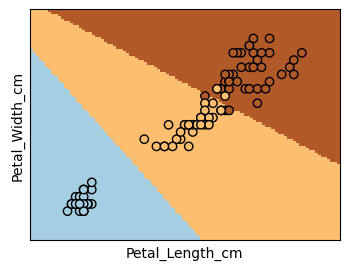

Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1 Score: 0.96
Confusion Matrix:
Accuracy:  95.55555555555556
The accuracy of the Logistic Regression is 0.9555555555555556
y_test     | y_pred     | setosa(%)  | versicolor(%) | virginica(%)
-----------------------------------------------------------------
2          | 2          | 0.0        | 0.04          | 0.96      
1          | 1          | 0.09       | 0.87          | 0.04      
0          | 0          | 0.95       | 0.05          | 0.0       
2          | 2          | 0.0        | 0.1           | 0.9       
0          | 0          | 0.95       | 0.05          | 0.0       
2          | 2          | 0.0        | 0.01          | 0.99      
0          | 0          | 0.95       | 0.05          | 0.0       
1          | 1          | 0.01       | 0.65          | 0.34      
1          | 1          | 0.01       | 0.7           | 0.29      
1          | 1          | 0.05       | 0.85          | 0.1       
2          | 1          | 0.0        |

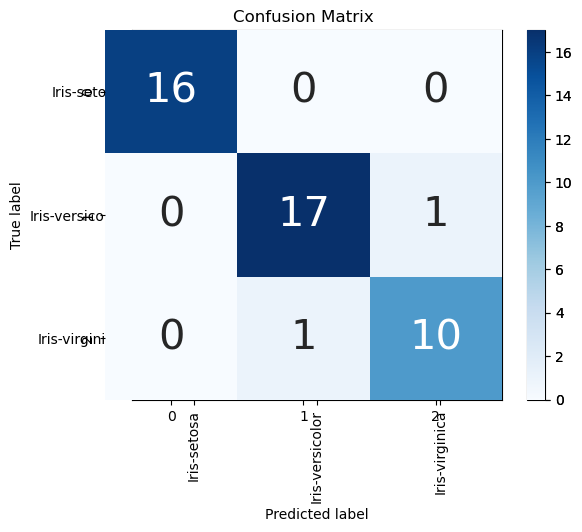

In [1]:
#EXERCISE 2.2
#Create a logistic regression classifier to classify the three types of flowers in the Iris dataset based on the petal length 
#and petal width. Make sure to evaluate the performance with the appropiate metrics and plot the decision boundaries.

#Overview:Classification methods are used when the target (dependent) variable is categorical, and the goal is to assign 
#each data point to a specific category. Here the explanatory variables (independent) can be either categorical or continous. 
#Hence, the amount of classification algorithms is very long. Classification algorithms, unlike regressions, use evaluation 
#metrics that are based on the amount of correct predictions  of the model based on the known labels (true values).
#This is usually expressed as a confusion matrix, a table with four entries for a binary classification model: 
#the True Positives (TP) and True Negatives (TN), where the model correctly predicts one class or the other, and the False Positives 
#(FP) and False Negatives (FN), where the model incorrectly predicts the positive and negative class, respectively.

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

#Sci-Kit learn uses a default threshold of P>0.5 for binary classifications.

#First define function used to later evaluate classification results, courtesy of Dr. Rodriguez:
def compute_evaluation_metrics(model, X_test, y_test, labels):
    y_pred = model.predict(X_test)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')

    # Precision, Recall, F1 Score for binary classification
    if len(np.unique(y_test)) == 2:
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        print(f'Precision: {precision:.2f}')
        print(f'Recall: {recall:.2f}')
        print(f'F1 Score: {f1:.2f}')

    # Precision, Recall, F1 Score for multi-class classification
    else:
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        print(f'Precision: {precision:.2f}')
        print(f'Recall: {recall:.2f}')
        print(f'F1 Score: {f1:.2f}')

    # Confusion Matrix
    print('Confusion Matrix:')
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=labels, xticks_rotation='vertical')
    
#Defining plotting function, courtesy of Dr. Rodriguez

#The plot_decision_regions() function uses numpy arrays for coding both the features (X) and the dependent variable, the category (y) as well as an array of indexes that defines which are in the test and training group. If you do not input them in the correct format (not as dataframes,...) the function will fail.
#Test and training group are separated as follows, resulting in dataframes:
#X_train_logreg, X_test_logreg, Y_train_logreg, Y_test_logreg = train_test_split(X, Y, test_size=0.2, random_state=42)
#Once model is trained, you can pass them to the function while converting them to arrays:
#plot_decision_regions(X.to_numpy(), Y.to_numpy(), logistic_reg_model, 0.2, X_test_logreg.index.to_numpy(), list(iris['target_names']))
#Subindexing y with y[0] is done before converting it into array.      
        
def plot_decision_regions(X, y, classifier, resolution, test_idx=None, labels=None):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    cmap = plt.get_cmap('Paired', len(markers))

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=1, c=cmap(idx), 
                    marker=markers[idx], label=labels[idx])
        
    # highlight test samples
    if test_idx.any():
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='black',
        alpha=0.2, linewidth=0.1, marker='o',
        s=55, label='test set')


        

        
        

#Loading again the iris dataset to start over with a clean slate using the attribute information as the column names

csv_url='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

col_names = ['Sepal_Length_cm','Sepal_Width_cm','Petal_Length_cm','Petal_Width_cm','Species']


#Creating a dataframe containing all original data
log_reg_df =  pd.read_csv(csv_url, names = col_names)
#Checking dataframe
log_reg_df.head()
log_reg_df.isnull().sum()
#Making back-up copy of dataframe
log_reg_df_copy=log_reg_df

# The names of the classes (3 flower types), not encoded as 0s and 1s for plot purposes
unique_labels = list(log_reg_df_copy['Species'].unique())


#Define the dependent and independent variables
#Label encoding because logistic regression algorithms do not take non-numerical or non-boolean data as inputs
#log_reg_df_copy.Species.replace({'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2},inplace=True)
#Alternatively:
le = LabelEncoder()
log_reg_df_copy['Species'] = le.fit_transform(log_reg_df_copy['Species'])

#The categorical dependent response y output variable used for classification is "Species" (renamed from class or target_names) that includes
#the 3 different Species (classes) of Iris encoded now as 0,1, or 2:
#y = log_reg_df.iloc[:, 4].values
y = log_reg_df_copy['Species']

#The continuous independent variables or features we are interested in for this problem are "Petal_Width_cm" and "Petal_Length_cm"
X = log_reg_df_copy.iloc[:, [2,3]].values

#Splitting dataset into the Training set and Test set:, Assumed 30% of data is set aside for testing:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

# Feature Scaling of "Petal_Width_cm" and "Petal_Length_cm"
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fitting Logistic Regression to the Training set
# Create an instance of Logistic Regression Classifier and fit the data.
lr = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
lr.fit(X_train, y_train)

#Plotting data
#plot_decision_regions(X.to_numpy(), y[0].to_numpy(), lr, 0.1, X_test.index.to_numpy(), unique_labels)
#plt.xlabel('First PC')
#plt.ylabel('Second PC')
#plt.legend(loc='upper right')
#Save image
#plt.savefig(path.join('plots', 'Logistic_IRIS.png'))
#plt.show()

_, ax = plt.subplots(figsize=(4, 3))
DecisionBoundaryDisplay.from_estimator(
    lr,
    X_train,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="Petal_Length_cm",
    ylabel="Petal_Width_cm",
    eps=0.5,
)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors="k", cmap=plt.cm.Paired)
plt.xticks(())
plt.yticks(())
plt.show()


# We check the metrics in this case and observe results!
compute_evaluation_metrics(lr, X_test, y_test, unique_labels)
#Evidently, a high accuracy of 96% was achieved and the iris flowers were properly classified based on Petal_Width and Petal_Length

#Another calculation for accuracy
print("Accuracy: ", lr.score(X_test, y_test) * 100)

## Predicting Test set results
y_pred = lr.predict(X_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(y_pred,y_test))

#Predicting probabilities
probs_y=lr.predict_proba(X_test)
probs_y=np.round(probs_y, 2)

#Tabulating Probabilities
results = "{:<10} | {:<10} | {:<10} | {:<13} | {:<5}".format("y_test", "y_pred", "setosa(%)", "versicolor(%)", "virginica(%)\n")
results += "-"*65+"\n"
results += "\n".join("{:<10} | {:<10} | {:<10} | {:<13} | {:<10}".format(x, y, a, b, c) for x, y, a, b, c in zip(y_test, y_pred, probs_y[:,0], probs_y[:,1], probs_y[:,2]))
results += "\n"+"-"*65+"\n"
print(results)

#Building Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

# Plotting confusion matrix (also inlcuded in compute_evaluation_metrics output )as sns heatmap 
ax = plt.axes()
df_confusion = confusion
sns.heatmap(df_confusion, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()




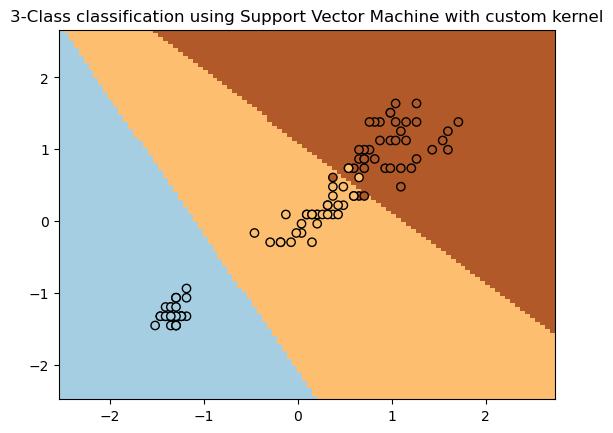

The accuracy of the SVC is 0.9777777777777777


In [2]:
#EXERCISE 2.3:
#Solve the same classification task problem but with a Support Vector Machine (SVM) classifier. 
#Compare the performance with the logistic model you build.

#Overview:Support Vector Machines (SVM) are powerful supervised learning models used for classification and regression tasks.
#SVM aims to find the optimal hyperplane that separates data points of different classes in feature space.
#In contrast with the perceptron, where the objective was to minimized misclassification errors, in SVMs the optimization 
#objective is to maximize the margin (the learning rule of SVM), defined as the distance between the separating hyperplane (the decision boundary) and the training samples that are closest to this hyperplane, which are the so-called 
#support vectors (the data points that lie closest to the decision boundary).

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

from sklearn.svm import SVC   #for Support Vector Machine (SVM) Algorithm
from sklearn import svm
#svc=SVC()
#svc.fit(X_train,y_train)

def my_kernel(X_train, y_train):
    """
    We create a custom kernel:

                 (2  0)
    k(X, Y) = X  (    ) Y.T
                 (0  1)
    """
    M = np.array([[2, 0], [0, 1.0]])
    return np.dot(np.dot(X_train, M), y_train.T)


h = 0.02  # step size in the mesh

# we create an instance of SVM and fit out data.
svc = svm.SVC(kernel=my_kernel)
svc.fit(X_train, y_train)

ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    svc,
    X_train,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors="k")
plt.title("3-Class classification using Support Vector Machine with custom kernel")
plt.axis("tight")
plt.show()


prediction=svc.predict(X_test)
print('The accuracy of the SVC is',metrics.accuracy_score(prediction,y_test))


## Exercise 3: Neural networks

The MNIST dataset is a cornerstone in the field of computer vision and machine learning. It consists of a collection of 28x28 grayscale images of handwritten digits (0 through 9) and was originally created for training and testing various machine learning models because of its simplicity.

This dataset is available on **Keras**, where each image in the MNIST dataset represents a single digit and is accompanied by its corresponding label, denoting the digit it portrays.

LeNet-5, which we have seen in our class, is a pioneering CNN architecture developed by Yann LeCun and his collaborators in the late 1990s and was one of the first successful applications of CNNs to handwritten digit recognition. 


Implement a LeNet-5 structure using keras to train a model using the MNIST dataset. This is a suggested structure (you can apply another one):

1. **Convolutional Layer (CONV1)**:

    Parameters: Input (N) = 28 x 28 x 1, Kernel (K) = 5 x 5
    Activation: ReLu
    Apply 6 filters

<!-- Add an empty line here -->

2. **Average Pooling Layer (POOL1)**:

    Parameters: Kernel (K) = 2 x 2

<!-- Add an empty line here -->

3. **Convolutional Layer (CONV2)**:

    Parameters: Kernel (K) = 5 x 5
    Activation: ReLu
    Apply 16 filters

<!-- Add an empty line here -->

4. **Average Pooling Layer (POOL2)**:

    Parameters: Kernel (K) = 2 x 2

<!-- Add an empty line here -->

5. **Fully Connected layer (FC1)**:

    120 neurons
    Activation: ReLu

<!-- Add an empty line here -->

6. **Fully Connected layer (FC2)**:

    84 neurons
    Activation: ReLu

<!-- Add an empty line here -->

7. **Output layer (Softmax)**:

    10 neurons
    Activation: Softmax
    
Do not forget about the normalization of the pixel integers into [0,1] floats and to one-hot encode the labels!

Finally, evaluate and interpret the performance of the model by plotting the training history (including the loss and accuracy metrics for the test dataset) and discussing it.

In [5]:
#MNIST Image is 28x28 pixel, but it was 32x32 pixel because of applied zero padding.
#from tensorflow.keras import Sequential
import tensorflow as tf
from tensorflow import keras
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
#import gzip
import numpy as np
import pandas as pd
from time import time
from sklearn.model_selection import train_test_split
import keras.layers as layers
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
#from keras.utils.np_utils import to_categorical
from keras.callbacks import TensorBoard
from keras import backend
import seaborn as sns
from keras import models, layers
sns.set()

num_classes = 10
batch_size = 128
epoch = 15

#Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#Data exploration
print('# of training images:', train_images.shape[0])
print('# of test images:', test_images.shape[0])

plt.imshow(test_images[1], cmap='Greys')

def display_train_image(position):
    image = train_images[position].squeeze()
    plt.title('Example %d. Label: %d' % (position, train_labels[position]))
    plt.imshow(image, cmap=plt.cm.gray_r)

def display_test_image(position):
    image = test_images[position].squeeze()
    plt.title('Example %d. Label: %d' % (position, test_labels[position]))
    plt.imshow(image, cmap=plt.cm.gray_r)

#display_train_image(0)
#display_test_image(0)
#display_train_image(1)
#display_test_image(1)

train_labels_count = np.unique(train_labels, return_counts=True)
dataframe_train_labels = pd.DataFrame({'Label':train_labels_count[0], 'Count':train_labels_count[1]})
dataframe_train_labels

#fig, ax = plt.subplots(figsize = (8, 4))
#sns.countplot(data = dataframe_train_labels[1], x = "label", ax = ax, color = "#101820")
#ax.set_title("Countplot for Train Labels")
#sns.despine()
#plt.show()

img_rows, img_cols = train_images.shape[1:]

if backend.image_data_format() == 'channels_first':
            train_images = train_images.reshape(train_images.shape[0], 1, img_rows, img_cols)
            test_images = test_images.reshape(test_images.shape[0], 1, img_rows, img_cols)
            input_shape = (1, img_rows, img_cols)
else:
            train_images = train_images.reshape(train_images.shape[0], img_rows, img_cols, 1)
            test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)
            input_shape = (img_rows, img_cols, 1)

print(input_shape)

#MNIST Image is 28x28 pixel, but it was 32x32 pixel because of applied zero padding.
#from tensorflow.keras import Sequential
import tensorflow as tf
from tensorflow import keras
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
#import gzip
import numpy as np
import pandas as pd
from time import time
from sklearn.model_selection import train_test_split
import keras.layers as layers
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
#from keras.utils.np_utils import to_categorical
from keras.callbacks import TensorBoard
from keras import backend
import seaborn as sns
from keras import models, layers
sns.set()

num_classes = 10
batch_size = 128
epoch = 15

#Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#Data exploration
print('# of training images:', train_images.shape[0])
print('# of test images:', test_images.shape[0])

plt.imshow(test_images[1], cmap='Greys')

def display_train_image(position):
    image = train_images[position].squeeze()
    plt.title('Example %d. Label: %d' % (position, train_labels[position]))
    plt.imshow(image, cmap=plt.cm.gray_r)

def display_test_image(position):
    image = test_images[position].squeeze()
    plt.title('Example %d. Label: %d' % (position, test_labels[position]))
    plt.imshow(image, cmap=plt.cm.gray_r)

#display_train_image(0)
#display_test_image(0)
#display_train_image(1)
#display_test_image(1)

train_labels_count = np.unique(train_labels, return_counts=True)
dataframe_train_labels = pd.DataFrame({'Label':train_labels_count[0], 'Count':train_labels_count[1]})
dataframe_train_labels

#fig, ax = plt.subplots(figsize = (8, 4))
#sns.countplot(data = dataframe_train_labels[1], x = "label", ax = ax, color = "#101820")
#ax.set_title("Countplot for Train Labels")
#sns.despine()
#plt.show()

img_rows, img_cols = train_images.shape[1:]

if backend.image_data_format() == 'channels_first':
            train_images = train_images.reshape(train_images.shape[0], 1, img_rows, img_cols)
            test_images = test_images.reshape(test_images.shape[0], 1, img_rows, img_cols)
            input_shape = (1, img_rows, img_cols)
else:
            train_images = train_images.reshape(train_images.shape[0], img_rows, img_cols, 1)
            test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)
            input_shape = (img_rows, img_cols, 1)

print(input_shape)

#Splitting training data into training and validation data:
validation = {}
train_images, validation['images'], train_labels, validation['labels'] = train_test_split(train_images, train_labels, test_size=0.2, random_state=0)
validation_images = validation['images']
validation_labels = validation['labels']

print('Number of training images:', train_images.shape[0])
print('Number of validation images:', validation_images.shape[0])
print('Number of test images:', test_images.shape[0])

# MINST images are 28x28 pixels, but LeNET requires 32x32 pixels. Therefore, we pad images with 0s on their edges
train_images = np.pad(train_images, ((0,0),(2,2),(2,2),(0,0)), 'constant')
validation_images = np.pad(validation_images, ((0,0),(2,2),(2,2),(0,0)), 'constant')
test_images = np.pad(test_images, ((0,0),(2,2),(2,2),(0,0)), 'constant')

#Normalizing data
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
validation_images = validation_images.astype('float32')
train_images /= 255
test_images /= 255
validation_images /= 255

#One-Hot Encoding for numbers # 0-9
train_labels_encoded = keras.utils.to_categorical(train_labels, num_classes)
test_labels_encoded = keras.utils.to_categorical(test_labels, num_classes)
validation_labels_encoded = keras.utils.to_categorical(validation_labels, num_classes)

#Getting dimensions of input matrix
img_rows, img_cols = train_images.shape[1], train_images.shape[2]
input_shape = (img_rows, img_cols, 1)
print(input_shape)
print("Updated Image Shape: {}".format(train_images[0].shape))

#The following is suggested LeNET-5 architecture that was ultimately modified
#Convolutional Layer (CONV1):Parameters: Input (N) = 28 x 28 x 1, Kernel (K) = 5 x 5 Activation: ReLu Apply 6 filters
#((N + 2P - K) / S) + 1 = ((50 + 4 - 5) / 1) + 1 = 50 x 50 
#We will apply 12 filters / kernels so we will get a 50 x 50 x 12 dimensional output
#Average Pooling Layer (POOL1):Parameters: Kernel (K) = 2 x 2
#Convolutional Layer (CONV2):Parameters: Kernel (K) = 5 x 5 Activation: ReLu Apply 16 filters
#Average Pooling Layer (POOL2):Parameters: Kernel (K) = 2 x 2
#Fully Connected layer (FC1): 120 neurons Activation: ReLu
#Fully Connected layer (FC2):84 neurons Activation: ReLu
#Output layer (Softmax):10 neurons Activation: Softmax

# Let's define the LeNet-5 model
from keras.layers import Conv2D, MaxPool2D, AveragePooling2D, Flatten
model = Sequential()
model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu',input_shape=input_shape))
#model.add(layers.Conv2D(filters=6, kernel_size=(5, 5), strides=(1,1), activation='relu', padding="same",input_shape=input_shape))
model.add(layers.AveragePooling2D())
#model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))
model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
#model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='valid'))
#model.add(layers.Conv2D(filters=16, kernel_size=(5, 5), strides=(1, 1),activation='relu', padding='valid'))
model.add(layers.AveragePooling2D())
#model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
model.add(layers.Flatten())
model.add(layers.Dense(units=120, activation='relu'))
#model.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'))
model.add(layers.Dense(units=84, activation='relu'))
#model.add(layers.Dense(units=84, activation='tanh'))
model.add(layers.Dense(units=num_classes, activation='softmax'))

model.summary()

# Compile the model with categorical crossentropy as the loss function and with a 5% of learning rate.
# As the numerical method to minimize the loss function we will use the Stochastic gradient descent (SGD)
## Accuracy, the ratio of correctly predicted observations to the total, as the evaluation metric

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.SGD(learning_rate=0.05),metrics=["accuracy"])

#train_generator = ImageDataGenerator().flow(train_images, train_labels, batch_size=batch_size)
#validation_generator = ImageDataGenerator().flow(validation_images, validation_labels, batch_size=batch_size)
#steps_per_epoch = train_images.shape[0]//batch_size
#validation_steps = validation_images.shape[0]//batch_size
#tensorboard = TensorBoard(log_dir="logs/{}".format(time()))
#model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=epochs, validation_data=validation_generator, validation_steps=validation_steps,shuffle=True, callbacks=[tensorboard])

# Finally we train it
history = model.fit(train_images, train_labels_encoded,batch_size=batch_size,verbose=1,epochs=epoch,validation_data=(validation_images, validation_labels_encoded))

score = model.evaluate(test_images, test_labels_encoded, batch_size=batch_size)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print()
print('Test Loss= ', score)


#plot_loss_curves(history)
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#We infer from the profile that this simple architecture appears to capture the relevant information and build an accurate model, since the accuracy on the test dataset plateaus at around 97% of accuracy (remember that for a binary classifier, we expect 50% of accuracy of a random untrained model).
#Moreover, by comparing the training and testing dataset loss and accuracy, we can infer that a little earlier of the 15 epochs the model cannot improve more since the metrics on the test dataset get stuck (it fluctuates or even decays) while the training metrics keep improving, suggesting that the model enters into an overfitting dynamic.
#This was expected, since LeNet-5 is a very simple CNN whose main application is to distinguish digits (https://en.wikipedia.org/wiki/LeNet). Note that the CNNs proposed by the author of the dataset they have far more hidden layers and complexity than the one explained here. This allows to reach 0.97 levels of accuracy after very few epochs of training.


#Thank you    



ModuleNotFoundError: No module named 'tensorflow'

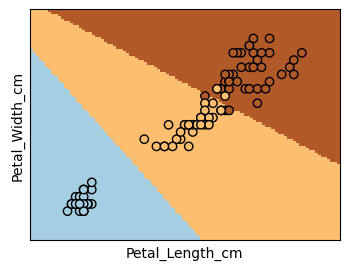

Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1 Score: 0.96
Confusion Matrix:
Accuracy:  95.55555555555556
The accuracy of the Logistic Regression is 0.9555555555555556
y_test     | y_pred     | setosa(%)  | versicolor(%) | virginica(%)
-----------------------------------------------------------------
2          | 2          | 0.0        | 0.04          | 0.96      
1          | 1          | 0.09       | 0.87          | 0.04      
0          | 0          | 0.95       | 0.05          | 0.0       
2          | 2          | 0.0        | 0.1           | 0.9       
0          | 0          | 0.95       | 0.05          | 0.0       
2          | 2          | 0.0        | 0.01          | 0.99      
0          | 0          | 0.95       | 0.05          | 0.0       
1          | 1          | 0.01       | 0.65          | 0.34      
1          | 1          | 0.01       | 0.7           | 0.29      
1          | 1          | 0.05       | 0.85          | 0.1       
2          | 1          | 0.0        |

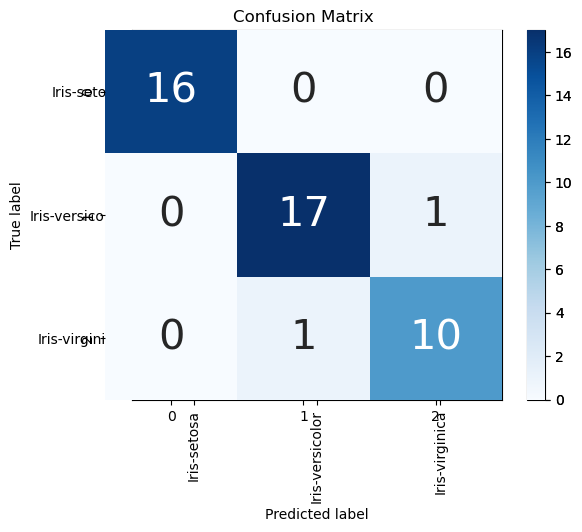

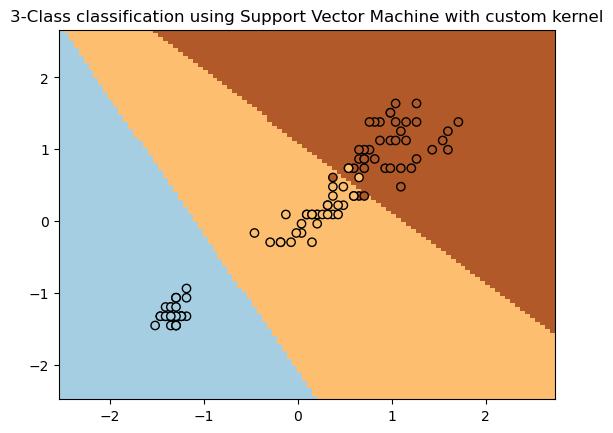

The accuracy of the SVC is 0.9777777777777777
